In [1]:

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-203-g6371de88 Python-3.8.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)


Setup complete ✅ (24 CPUs, 344.4 GB RAM, 189.9/196.8 GB disk)


# 데이터 전처리

## 1. custom.yaml 생성

```
# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /data/NIA50/data/yolo  # dataset root dir
train: train.txt  # train images (relative to 'path') 1281167 images
val: val.txt  # val images (relative to 'path') 50000 images
test:  # test images (optional)

#CATEGORIES = {"Vehicle_Car": 0, "Vehicle_Bus": 1, "Vehicle_Motorcycle": 2, "Vehicle_Unknown": 3, "Pedestrian_Pedestrian": 4, "Pedestrian_Bicycle": 5}

nc: 6  # number of classes
names: ['Vehicle_Car', 'Vehicle_Bus', 'Vehicle_Motorcycle', 'Vehicle_Unknown', 'Pedestrian_Pedestrian', 'Pedestrian_Bicycle']

  ```

## 2. Labels 생성
- 훈련에 사용할 데이터셋의 Label을 생성한다.

```
/data/NIA50/data/yolo/im0.jpg  # image
/data/NIA50/data/yolo/im0.txt  # label
```

### Copy images and xml labels to yolo folder

In [8]:
import os
import shutil

ROOT_DIR = "/data/NIA50/data/aihub"
YOLO_IMG_DIR = "/data/NIA50/data/yolo/images"

for (root, dirs, files) in os.walk(ROOT_DIR):
    print(root)
    
    if '30_전방' in root:
        for file in files:
            if file.endswith('.jpg'):
                shutil.copy(os.path.join(root, file), os.path.join(YOLO_IMG_DIR, file))   

/data/NIA50/data/aihub
/data/NIA50/data/aihub/도심로
/data/NIA50/data/aihub/도심로/야간일몰
/data/NIA50/data/aihub/도심로/야간일몰/맑음
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방/20200708_201450
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방/20200708_201450/3
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방/20200708_201450/3_annotations_v001_1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방/20200708_201450
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방/20200708_201450/1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방/20200708_201450/1_annotations_v001_1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방/20200708_201450
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방/20200708_201450/2_annotations_v001_1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방/20200708_201450/2
/data/NIA50/data/aihub/도심로/주간일출
/data/NIA50/data/aihub/도심로/주간일출/맑음
/data/NIA50/data/aihub/도심로/주간일출/맑음/120_전방
/data/NIA50/data/aihub/도심로/주간일출/맑음/120_전방/20201019_175537
/data/N

In [9]:
YOLO_XML_DIR = "/data/NIA50/data/yolo/labels_xml"

for (root, dirs, files) in os.walk(ROOT_DIR):
    print(root)
    
    if '30_전방' in root:
        for file in files:
            if file.endswith('.xml'):
                shutil.copy(os.path.join(root, file), os.path.join(YOLO_XML_DIR, file))   

/data/NIA50/data/aihub
/data/NIA50/data/aihub/도심로
/data/NIA50/data/aihub/도심로/야간일몰
/data/NIA50/data/aihub/도심로/야간일몰/맑음
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방/20200708_201450
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방/20200708_201450/3
/data/NIA50/data/aihub/도심로/야간일몰/맑음/120_전방/20200708_201450/3_annotations_v001_1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방/20200708_201450
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방/20200708_201450/1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/30_전방/20200708_201450/1_annotations_v001_1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방/20200708_201450
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방/20200708_201450/2_annotations_v001_1
/data/NIA50/data/aihub/도심로/야간일몰/맑음/60_전방/20200708_201450/2
/data/NIA50/data/aihub/도심로/주간일출
/data/NIA50/data/aihub/도심로/주간일출/맑음
/data/NIA50/data/aihub/도심로/주간일출/맑음/120_전방
/data/NIA50/data/aihub/도심로/주간일출/맑음/120_전방/20201019_175537
/data/N

### Convert xml to json

In [44]:
import xmltodict, json, glob

YOLO_XML_DIR = "/data/NIA50/data/yolo/labels_xml"
YOLO_JSON_DIR = "/data/NIA50/data/yolo/labels_json"

xml_files = glob.glob(os.path.join(YOLO_XML_DIR, '*.xml'))

for xml_file in xml_files:
    with open(xml_file) as fd:
        doc = xmltodict.parse(fd.read())
        json_file = os.path.join(YOLO_JSON_DIR, os.path.basename(xml_file).replace('.xml', '.json'))
        with open(json_file, 'w') as f:
            json.dump(doc, f, indent=4)
            
        

### Convert xml to txt
- xml to txt
- yolo format<br>

``` category_id x_center y_center width height ```

``` 0 0.481719 0.634028 0.690625 0.713278 ```


In [7]:
from glob import glob
from sre_parse import CATEGORIES
import cv2, json

YOLO_JSON_DIR = "/data/NIA50/data/yolo/labels_json"
YOLO_LABEL_DIR = "/data/NIA50/data/yolo/labels"
YOLO_IMG_DIR = "/data/NIA50/data/yolo/images"

json_files = sorted(glob(os.path.join(YOLO_JSON_DIR, '*.json')))
img_files = sorted(glob(os.path.join(YOLO_IMG_DIR, '*.jpg')))

img = cv2.imread(img_files[0])
img_w = img.shape[1]
img_h = img.shape[0]

CATEGORIES = {"Vehicle_Car": 0, "Vehicle_Bus": 1, "Vehicle_Motorcycle": 2, "Vehicle_Unknown": 3,
              "Pedestrian_Pedestrian": 4, "Pedestrian_Bicycle": 5}

def kitti_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

def json2txt(obj):
    category = obj['name']
    if category not in CATEGORIES:
        return
    bbox = obj['bndbox']
    x1 = int(bbox['xmin'])
    y1 = int(bbox['ymin'])
    x2 = int(bbox['xmax'])
    y2 = int(bbox['ymax'])
    xywh = kitti_to_yolo(x1, y1, x2, y2, img_w, img_h)
    
    fa.write(f"{CATEGORIES[category]} {' '.join(map(str, xywh))}\n")

for idx, json_file in enumerate(json_files):
    with open(json_file) as f:
        data = json.load(f)
        label_file = os.path.join(YOLO_LABEL_DIR, os.path.basename(json_file)[:-12] +'.txt')
        with open(label_file, 'w') as fa:
            if type(data['annotation']['object']) == list: 
                for obj in data['annotation']['object']:
                    json2txt(obj)
            else:
                obj = data['annotation']['object']
                json2txt(obj)
            

# fix txt file name

In [63]:
from glob import glob
import os

YOLO_LABEL_DIR = "/data/NIA50/data/yolo/labels"

files = sorted(glob(os.path.join(YOLO_LABEL_DIR, '*.txt')))
file_list = [os.path.basename(file) for file in files]

for file in file_list:
    os.renames(os.path.join(YOLO_LABEL_DIR, file), os.path.join(YOLO_LABEL_DIR, file[:-11] + '.txt'))

# Create train.txt and val.txt

In [84]:
from glob import glob
import os
from sklearn.model_selection import train_test_split

YOLO_IMG_DIR = "/data/NIA50/data/yolo/images"

files = sorted(glob(os.path.join(YOLO_IMG_DIR, '*.jpg')))

train, val = train_test_split(files, test_size=0.2, random_state=42)
train.sort()
val.sort()
print(f"train len: {len(train)}, val len: {len(val)}")

with open('/data/NIA50/data/yolo/train.txt', 'w') as f:
    for file in train:
        f.write(f"{file}\n")
        
with open('/data/NIA50/data/yolo/val.txt', 'w') as f:
    for file in val:
        f.write(f"{file}\n")

train len: 1298, val len: 325


# Train

In [11]:
# multi gpu
!python -m torch.distributed.run --nproc_per_node 2 train.py --img 640 --batch 16 --epochs 100 --data custom.yaml --cfg yolov5x.yaml --weights yolov5x.pt --name yolov5x_results --device 1,2

*****************************************
Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
*****************************************
train: weights=yolov5x.pt, cfg=yolov5x.yaml, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=1,2, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5x_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.

In [8]:
%cd /data/NIA50/yolov5 # single gpu
!python train.py --img 640 --batch 8 --epochs 150 --data custom.yaml --cfg yolov5x.yaml --weights yolov5x.pt --name yolov5x_results

/data/NIA50/yolov5
train: weights=yolov5x.pt, cfg=yolov5x.yaml, data=custom.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5x_results, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 3 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-203-g6371de88 Python-3.8.13 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

# Visualize image and bonding boxes before training

In [1]:
import matplotlib.pyplot as plt
import cv2, numpy as np, os
import json
from glob import glob

# cv2 image plt show method
def imshow(title = "Image", image = None, size = 20, rect = None):
    if image is None:
        assert False, "Image is None"
    elif isinstance(image, str):
        image = cv2.imread(image)    
        
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if rect is not None:
        for r in rect:
            # rect = [x, y, w, h]
            img = cv2.rectangle(img, (int(r[0]), int(r[1])), (int(r[2]), int(r[3])), (0, 255, 0), 2)
            
    
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(img)
    plt.axis( "off" )
    plt.title(title)
    plt.show()
    
def readLabel(label_path):
    with open(label_path,  "r" ) as f:
        label = f.read().splitlines()
    return label

def showkitti(idx: int, dataset, rect, split: str = "train", seq: int = None, frame: int = None):
    r'''
    args:
        - idx(int): index of the image
        - dataset(str): "kitti" or "kittimot"
        - split(str): train
        - seq(int): sequence number train: 0 ~ 20, test: 0 ~ 28
        - frame(int): frame number
    '''
    
    SPLIT = {"train": "training", "test": "testing"}
    
    if dataset == "kitti":
        kitti_path = f"/data/hwang/datasets/{dataset}" # your kitti path
        image_list = glob(os.path.join(kitti_path, SPLIT[split], "image_2", "*.png"))
        image_list.sort()
        label_list = glob(os.path.join(kitti_path, SPLIT[split], "label_2", "*.txt"))
        label_list.sort()

        label = np.array([x.split(' ') for x in readLabel(label_list[idx]) if not x[:4] == 'Dont']).reshape(-1, 15)
        rect = np.array([x[4:8].astype(np.float32) for x in label])

        imshow("Image", cv2.imread(image_list[idx]), size = 30, rect=rect)
        print(label)
        
    elif dataset == "kittimot":
        kitti_path = f"/data/hwang/datasets/{dataset}" # your kittimot path
        
        image_list = glob(os.path.join(kitti_path, SPLIT[split], "image_02",f'{seq:04d}', "*.png"))
        label_list = glob(os.path.join(kitti_path, SPLIT[split], "label_02", "*.txt"))
        image_list.sort()
        label_list.sort()
        
        try:
            label = np.array([x.split(' ') for x in readLabel(label_list[seq])]).reshape(-1, 17)
        except:
            print("not enough arguments")
        
        rect = np.array([x[6:10].astype(np.float32) for x in label if x[0] == f'{frame}' and x[2] != 'DontCare'])
        imshow("Image", cv2.imread(image_list[frame]), size = 30, rect=rect)
        for l in label:
            if l[0] == str(frame) and l[2] != "DontCare":
                print(l)

def make_rect_txt(label, idx):
    with open(label[idx], 'r') as f:
        label = f.read().splitlines()
        for l in label:
            l = l.split(' ')
            rect = np.array([l[1:5]]).astype(np.float32)
            result = np.concatenate((result, rect), axis=0) if 'result' in locals() else rect
    
    return result

def make_rect_json(label, idx):
    with open(label[idx], 'r') as f:
        label = f.read().splitlines()
        for l in label:
            l = l.split(' ')
            

/data/NIA50/data/yolo/labels_json/1_20200708_200150_000000_v001_1.json
[[   0.  568.  400.  788.]
 [ 466.  554.  550.  589.]
 [ 550.  555.  630.  603.]
 [ 583.  541.  645.  578.]
 [ 640.  538.  725.  588.]
 [ 730.  544.  801.  572.]
 [ 705.  563.  803.  630.]
 [ 547.  580.  723.  701.]
 [ 787.  509.  983.  703.]
 [ 908.  449. 1070.  608.]
 [1008.  566. 1098.  643.]
 [1376.  526. 1450.  652.]
 [1270.  539. 1396.  695.]
 [1077.  532. 1321.  749.]
 [1427.  319. 1772.  674.]
 [1629.  553. 1696.  695.]
 [1644.  530. 1782.  753.]
 [1708.  493. 1919.  845.]
 [ 547.  543.  588.  574.]]


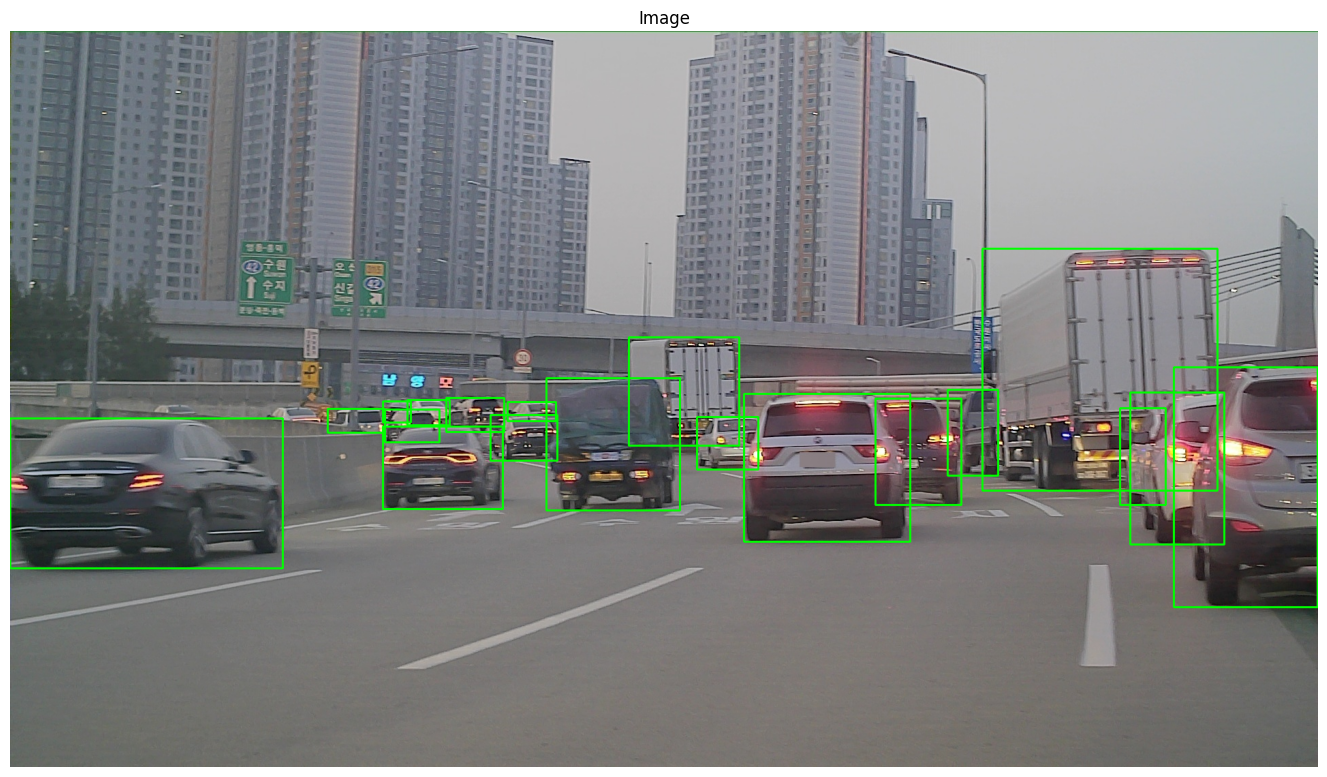

In [2]:
YOLO_IMG_DIR = "/data/NIA50/data/yolo/images"
YOLO_LABEL_DIR = "/data/NIA50/data/yolo/labels"
YOLO_JSON_DIR = "/data/NIA50/data/yolo/labels_json"
CATEGORIES = {"Vehicle_Car": 0, "Vehicle_Bus": 1, "Vehicle_Motorcycle": 2, "Vehicle_Unknown": 3,
              "Pedestrian_Pedestrian": 4, "Pedestrian_Bicycle": 5}

idx = 0


img_files = sorted(glob(os.path.join(YOLO_IMG_DIR, '*.jpg')))
label_files = sorted(glob(os.path.join(YOLO_LABEL_DIR, '*.txt')))
label_json_files = sorted(glob(os.path.join(YOLO_JSON_DIR, '*.json')))

img = cv2.imread(img_files[idx])
# rect=make_rect_txt(label_files, idx)

def json_cat(obj):
    category = obj['name']
    if category not in CATEGORIES:
        return None
    bbox = obj['bndbox']
    x1 = int(bbox['xmin'])
    y1 = int(bbox['ymin'])
    x2 = int(bbox['xmax'])
    y2 = int(bbox['ymax'])
    rect = np.array([x1, y1, x2, y2])
    
    return category, rect
    

def make_rect_json(label, idx):
    print(label[idx])
    with open(label[idx]) as f:
        data = json.load(f)
        label_file = os.path.join(YOLO_LABEL_DIR, os.path.basename(label[idx]).replace('.json', '.txt'))
        rect_array = np.array([])
        if type(data['annotation']['object']) == list:
            for obj in data['annotation']['object']:
                if json_cat(obj) is not None:
                    category, rect = json_cat(obj)
                    rect_array = np.concatenate((rect_array, rect), axis=0) if 'rect_array' in locals() else rect
        else:
            obj = data['annotation']['object']
            if json_cat(obj) is not None:
                    category, rect = json_cat(obj)
                    rect_array = np.concatenate((rect_array, rect), axis=0) if 'rect_array' in locals() else rect
    return rect_array.reshape(-1, 4)
                
rect = make_rect_json(label_json_files, idx)
print(rect)
imshow("Image", img, size = 30, rect=rect)